In [55]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 50
pd.options.display.max_columns = None

In [56]:
df_sales = pd.read_csv('sales_data_preprocessed.csv', parse_dates=['invoice_date'])
df_weather = pd.read_csv('weather_data.csv', parse_dates=['date'])
df_weather['date'] = df_weather['date'].dt.tz_convert(None)
df_weather['mean_temperature'] = (df_weather['temperature_2m_max'] + df_weather['temperature_2m_min'])/2

In [57]:
df_sales['sales'] = df_sales['quantity'] * df_sales['price']
df_sales

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,I192911,C642829,Female,66,Food & Beverage,5,26.150000,Credit Card,2021-01-01,Metrocity,130.750000
1,I313757,C438201,Female,43,Clothing,4,1200.320000,Credit Card,2021-01-01,Mall of Istanbul,4801.280000
2,I836951,C382440,Male,54,Clothing,3,900.240000,Cash,2021-01-01,Metrocity,2700.720000
3,I159235,C312481,Male,58,Food & Beverage,4,20.920000,Credit Card,2021-01-01,Mall of Istanbul,83.680000
4,I115941,C105769,Male,34,Clothing,1,300.080000,Cash,2021-01-01,Istinye Park,300.080000
...,...,...,...,...,...,...,...,...,...,...,...
146666,I986197,C793506,Female,28,Food & Beverage,5,26.150000,Credit Card,2024-01-15,Zorlu Center,130.750000
146667,I855732,C417341,Male,63,Books,1,60.600000,Debit Card,2024-01-15,Cevahir AVM,60.600000
146668,I469064,C794451,Female,31,Technology,5,718.807499,Debit Card,2024-01-15,Metropol AVM,3594.037497
146669,I997957,C179229,Male,18,Toys,5,71.680000,Credit Card,2024-01-15,Forum Istanbul,358.400000


In [58]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146671 entries, 0 to 146670
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   invoice_no      146671 non-null  object        
 1   customer_id     146671 non-null  object        
 2   gender          146671 non-null  object        
 3   age             146671 non-null  int64         
 4   category        146671 non-null  object        
 5   quantity        146671 non-null  int64         
 6   price           146671 non-null  float64       
 7   payment_method  146671 non-null  object        
 8   invoice_date    146671 non-null  datetime64[ns]
 9   shopping_mall   146671 non-null  object        
 10  sales           146671 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 12.3+ MB


In [59]:
df_sales.describe()

,age,quantity,price,invoice_date,sales
count,146671.000000,146671.000000,146671.000000,146671,146671.000000
mean,43.441055,3.003579,598.963049,2022-08-01 04:35:09.963114752,2022.783321
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,5.230000
25%,30.000000,2.000000,40.660000,2021-10-23 00:00:00,121.980000
50%,43.000000,3.000000,179.200000,2022-08-12 00:00:00,573.440000
75%,56.000000,4.000000,900.240000,2023-05-17 00:00:00,2700.720000
max,69.000000,5.000000,3601.020000,2024-01-15 00:00:00,15750.000000
std,15.004247,1.413662,771.196833,NaN,3077.561336


In [60]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1111 non-null   datetime64[ns]
 1   temperature_2m_max  1111 non-null   float64       
 2   temperature_2m_min  1111 non-null   float64       
 3   rain_sum            1111 non-null   float64       
 4   mean_temperature    1111 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 43.5 KB


In [61]:
df_weather.describe()

,date,temperature_2m_max,temperature_2m_min,rain_sum,mean_temperature
count,1111,1111.000000,1111.000000,1111.000000,1111.000000
mean,2022-07-10 00:00:00,18.993759,11.731968,2.112961,15.362863
min,2021-01-01 00:00:00,0.906000,-6.444000,0.000000,-1.894000
25%,2021-10-05 12:00:00,13.006001,6.556000,0.000000,9.931000
50%,2022-07-10 00:00:00,18.806000,11.506001,0.000000,15.031000
75%,2023-04-13 12:00:00,25.556000,17.606000,1.500000,21.731000
max,2024-01-16 00:00:00,38.806000,24.556000,57.700000,30.106000
std,NaN,7.890963,6.806037,5.201321,7.236332


# Perform EDA

In [62]:
print("BASIC STATISTICAL SUMMARY:")

# Basic statistical summary
print("\ndf_sales Summary Statistics:")
print(df_sales['sales'].describe())

print("\ndf_weather Summary Statistics:")
print(df_weather[['temperature_2m_max', 'temperature_2m_min']].describe())


# Check the time range of the data
print(
    f"\ndf_sales data range: {df_sales['invoice_date'].min()} to {df_sales['invoice_date'].max()}"
)
print(
    f"df_weather data date range: {df_weather['date'].min()} to {df_weather['date'].max()}"
)

# Count unique values
print(f"\nNumber of unique shopping mall: {df_sales['shopping_mall'].unique()}")
print(f"Number of unique category: {df_sales['category'].unique()}")

BASIC STATISTICAL SUMMARY:

df_sales Summary Statistics:
count    146671.000000
mean       2022.783321
std        3077.561336
min           5.230000
25%         121.980000
50%         573.440000
75%        2700.720000
max       15750.000000
Name: sales, dtype: float64

df_weather Summary Statistics:
       temperature_2m_max  temperature_2m_min
count         1111.000000         1111.000000
mean            18.993759           11.731968
std              7.890963            6.806037
min              0.906000           -6.444000
25%             13.006001            6.556000
50%             18.806000           11.506001
75%             25.556000           17.606000
max             38.806000           24.556000

df_sales data range: 2021-01-01 00:00:00 to 2024-01-15 00:00:00
df_weather data date range: 2021-01-01 00:00:00 to 2024-01-16 00:00:00

Number of unique shopping mall: ['Metrocity' 'Mall of Istanbul' 'Istinye Park' 'Kanyon'
 'Emaar Square Mall' 'Viaport Outlet' 'Cevahir AVM' 'Metropo

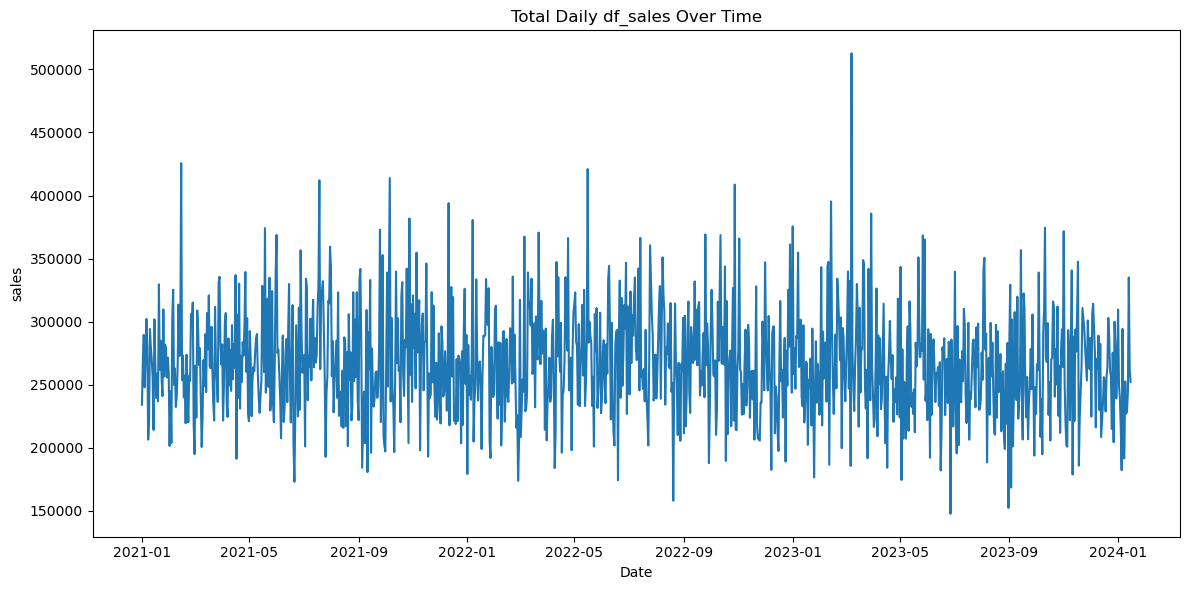

In [63]:
# df_sales trends over time
plt.figure(figsize=(12, 6))
daily_df_sales = df_sales.groupby('invoice_date')['sales'].sum().reset_index()
plt.plot(daily_df_sales['invoice_date'], daily_df_sales['sales'])
plt.title("Total Daily df_sales Over Time")
plt.xlabel("Date")
plt.ylabel("sales")
plt.tight_layout()

In [64]:
daily_df_sales

,invoice_date,sales
0,2021-01-01,234067.629993
1,2021-01-02,269187.759993
2,2021-01-03,289458.712484
3,2021-01-04,247931.527495
4,2021-01-05,270434.464989
...,...,...
1105,2024-01-11,228667.202479
1106,2024-01-12,244765.464972
1107,2024-01-13,334997.574984
1108,2024-01-14,262575.234989


<BarContainer object of 7 artists>

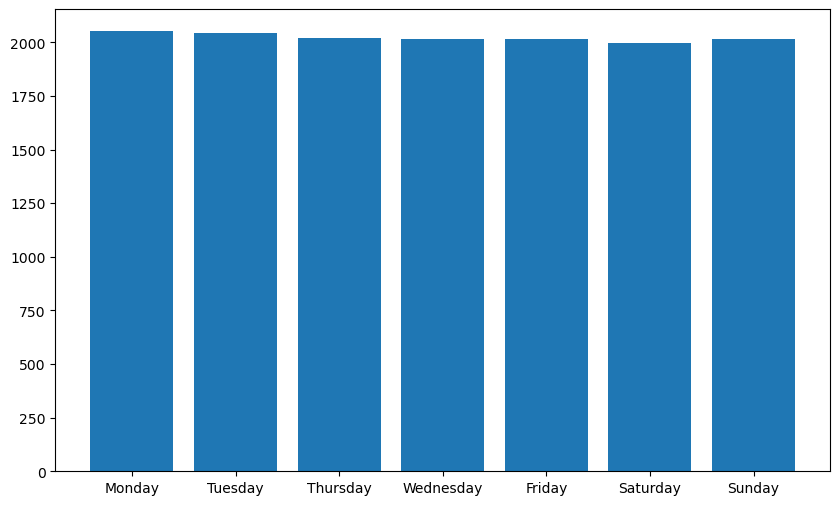

In [65]:
# df_sales by day of week
plt.figure(figsize=(10, 6))
df_sales['day_of_week'] = df_sales['invoice_date'].dt.day_of_week
day_names = [
    'Monday',
    'Tuesday',
    'Thursday',
    "Wednesday",
    'Friday',
    'Saturday',
    'Sunday',
]
df_sales_by_day = df_sales.groupby(['day_of_week'])['sales'].mean()

plt.bar(day_names, df_sales_by_day)

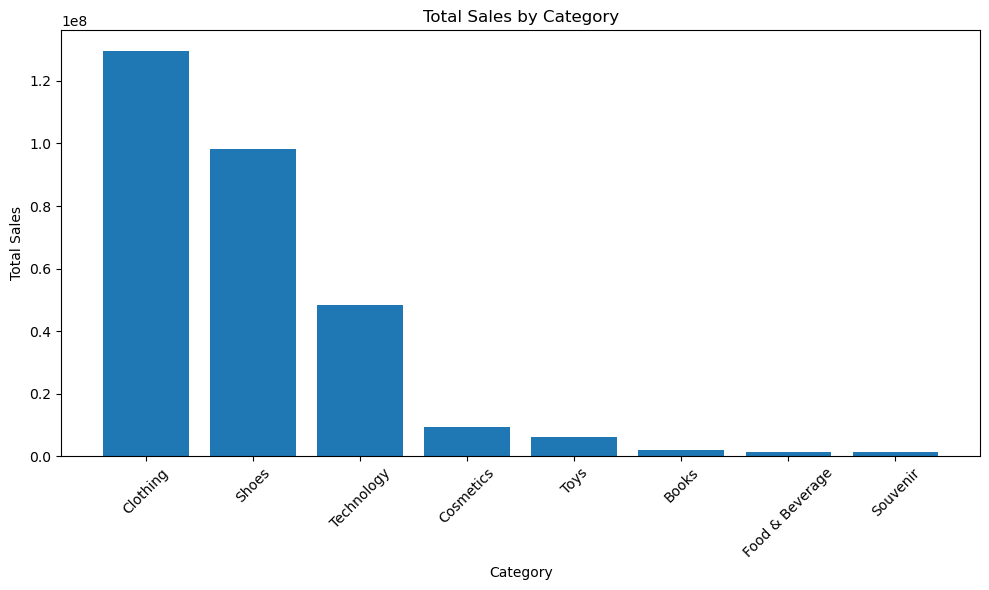

In [66]:
plt.figure(figsize=(10, 6))
category_sales  = df_sales.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.bar(category_sales.index, category_sales.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()

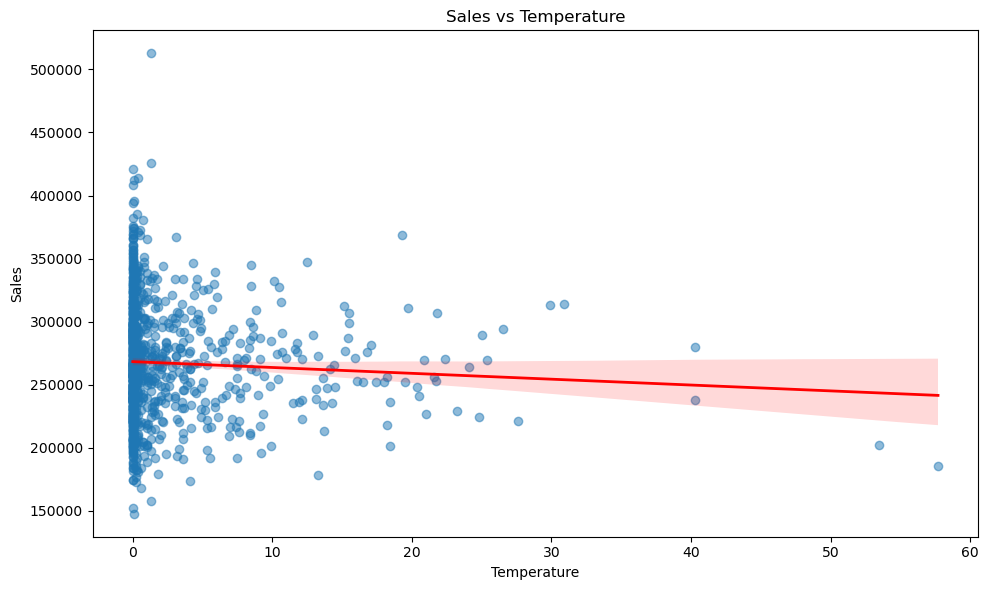

In [67]:
# Correlation between temperature and sales
plt.figure(figsize=(10, 6))

sample = pd.merge(left=df_sales.
    groupby('invoice_date')[['sales']].
    sum().
    reset_index(), 
    right=df_weather, 
    left_on='invoice_date', 
    right_on='date')

# Scatter plot with regression (trend) line
sns.regplot(
    data=sample,
    x='rain_sum',
    y='sales',
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red", "linewidth": 2},
)

plt.title('Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

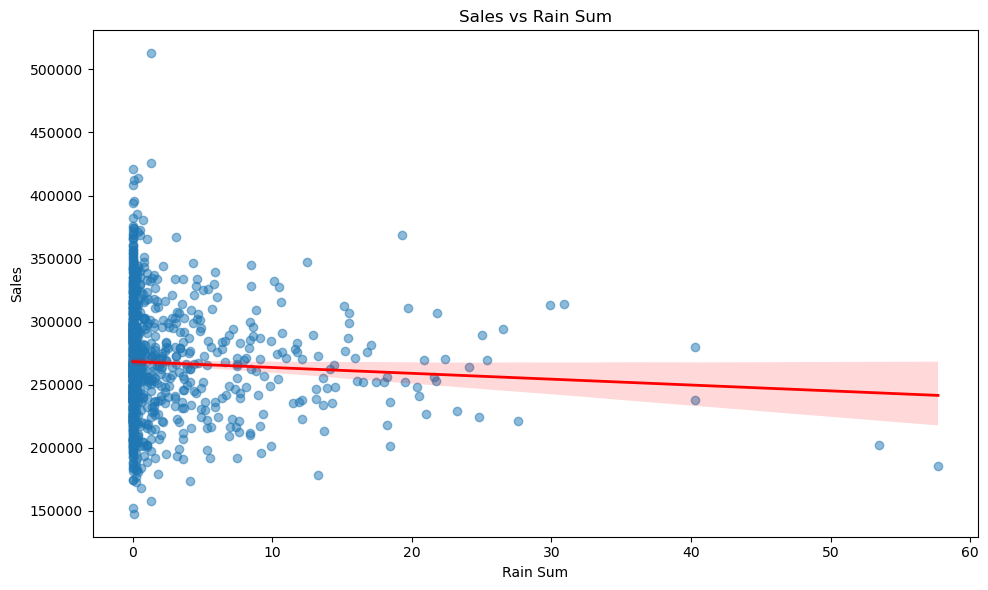

In [70]:
# Correlation between rain sum and sales
plt.figure(figsize=(10, 6))

sns.regplot(
    data=sample,
    x='rain_sum',
    y='sales',
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red", "linewidth": 2},
)

plt.title("Sales vs Rain Sum")
plt.xlabel("Rain Sum")
plt.ylabel("Sales")
plt.tight_layout()